In [1]:
%run "BackpropModule.ipynb"

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sigma = lambda z: 1/(1 + np.exp(-z))
d_sigma = lambda z: np.cosh(z/2)**(-2) / 4
diff_sigma = lambda z: np.cosh(z/2)**(-2) / 4

# initialises and resets and training done

def reset_network(n1=6, n2=7, random = np.random):
    global W1, W2, W3, b1, b2, b3
    W1 = random.randn(n1, 1)/2
    W2 = random.randn(n2, n1)/2
    W3 = random.randn(2, n2)/2
    b1 = random.randn(n1, 1)/2
    b2 = random.randn(n2, 1)/2
    b3 = random.randn(2, 1)/2
    
def network_function(a0):
    z1 = W1@a0 + b1
    a1 = sigma(z1)
    z2 = W2@a1 + b2
    a2 = sigma(z2)
    z3 = W3@a2 + b3
    a3 = sigma(z3)
    
    return a0, z1, a1,z2, a2,z3, a3

In [4]:
# third layer
def J3_W(x, y):
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2*(a3-y)
    J = J*(diff_sigma(z3))
    J = J@a2.T / x.size
    return J
def J3_b(x, y):
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2*(a3-y)
    J = J* diff_sigma(z3)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J


In [5]:
# Second Layer
def J2_W(x, y):
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2*(a3-y)
    J = J*(diff_sigma(z3))
    J = (J.T @ W3).T
    J = J*diff_sigma(z2)
    J = J@a1.T / x.size
    return J
def J2_b(x, y):
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2*(a3-y)
    J = J* diff_sigma(z3)
    J = (J.T @ W3).T
    J = J*diff_sigma(z2)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

In [6]:
# First Layer
def J1_W(x, y):
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2*(a3-y)
    J = J*(diff_sigma(z3))
    J = (J.T @ W3).T
    J = J*diff_sigma(z2)
    J = (J.T @ W2).T
    J = J*diff_sigma(z1)
    J = J@a0.T / x.size
    return J
def J1_b(x, y):
    a0, z1, a1, z2, a2, z3, a3 = network_function(x)
    J = 2*(a3-y)
    J = J* diff_sigma(z3)
    J = (J.T @ W3).T
    J = J*diff_sigma(z2)
    J = (J.T @ W2).T
    J = J*diff_sigma(z1)
    J = np.sum(J, axis=1, keepdims=True) / x.size
    return J

In [7]:
x, y = training_data()
reset_network()

<IPython.core.display.Javascript object>


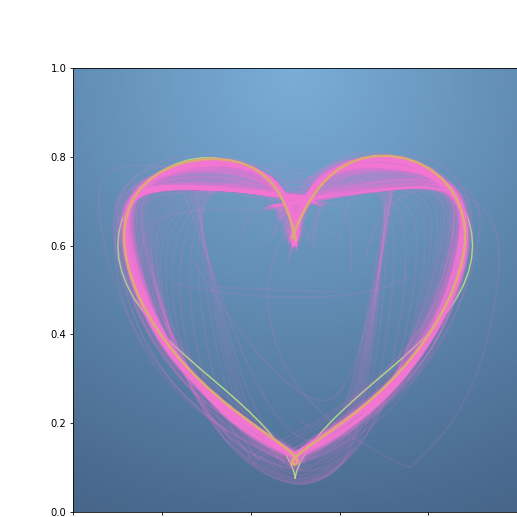

In [8]:
plot_training(x, y, iterations = 50000, aggression = 7, noise = 1)